In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The Central Limit Theorem

## Simulation: Does it really work?
* Creating a whatever distribution

In [23]:
# your code here!
population = np.random.choice([1, 2, 3, 4, 5, 6], p=[0.3, 0, 0.2, 0.2, 0, 0.3], size=100000)

In [24]:
len(population)

100000

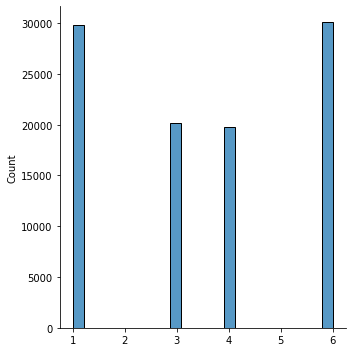

In [25]:
sns.displot(population)

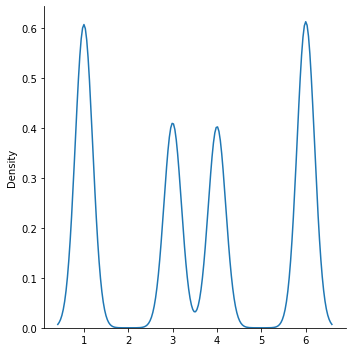

In [26]:
sns.displot(population, kind='kde')

In [27]:
population_mean = np.mean(population)
population_mean

3.50523

In [28]:
population_std = np.std(population)
population_std

1.9622723172638399

- take some samples from it and calculate its mean

In [29]:
# your code here!
sample1 = np.random.choice(population, size=10)
sample1

array([1, 6, 6, 4, 6, 1, 4, 4, 4, 6])

In [30]:
np.mean(sample1)

4.2

In [31]:
sample2 = np.random.choice(population, size=10)
sample2

array([6, 3, 6, 6, 3, 1, 3, 4, 1, 1])

In [32]:
np.mean(sample2)

3.4

In [33]:
sample3 = np.random.choice(population, size=10)
sample3

array([3, 4, 6, 6, 3, 3, 3, 1, 1, 4])

In [34]:
np.mean(sample3)

3.4

- take a sample N times and calculate the mean N times

In [39]:
thousand_sample_means = [np.mean(np.random.choice(population, size=10)) for item in range(10000)] # 1000 médias amostrais
thousand_sample_means[:10]

[3.0, 2.1, 2.7, 4.2, 4.5, 4.2, 3.6, 3.1, 4.0, 3.7]

In [40]:
np.mean(thousand_sample_means)

3.4979

In [41]:
population_mean

3.50523

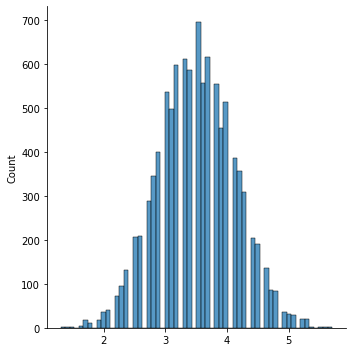

In [42]:
sns.displot(thousand_sample_means)

Standard Error of the sampling distribution will be:
    
$$ \sigma_{sample} = \frac{\sigma_{population}}{\sqrt{N}} $$

In [43]:
len(population)

100000

In [44]:
np.std(population)/np.sqrt(1000000)

0.00196227231726384

In [45]:
np.std(population)

1.9622723172638399

In [46]:
# your code here!
standard_error = np.std(population)/np.sqrt(10)
standard_error

0.6205249912050279

In [47]:
np.std(thousand_sample_means)

0.6208925752495353

- now you have a new set of data
- this data will be normally distributed as long as you increase the number samples you take

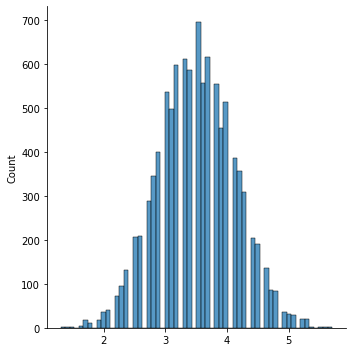

In [48]:
sns.displot(thousand_sample_means)

- the more samples you have, the more your distribution plot will resemble a normal shape

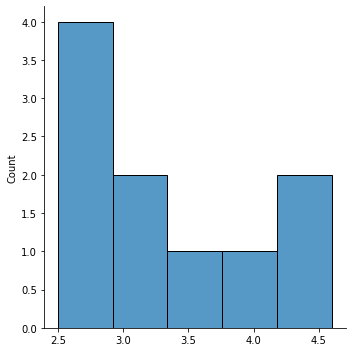

In [49]:
sns.displot(np.random.choice(thousand_sample_means, 10))

- the greater the size of your samples, the less will be the standard error

In [50]:
# your code here!
new_thousand_sample_means = [np.mean(np.random.choice(population, size=100)) for item in range(10000)]
new_thousand_sample_means[:10]

[3.51, 3.5, 3.51, 3.68, 3.47, 3.43, 3.51, 3.68, 3.52, 3.32]

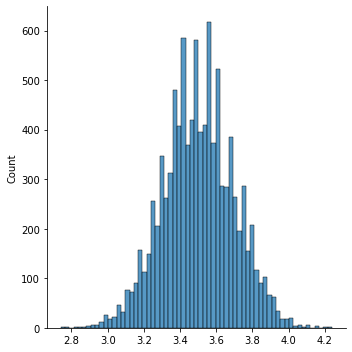

In [51]:
sns.displot(new_thousand_sample_means)

# Confidence Intervals

## Suppose you want to estimate the height of men in Brazil.

### Mini-sample

Let's suppose I somehow know the standard deviation of men's height to be ~10cm. This means that men's height comes from a normal distribution with the following parameters:
$$N(\mu, 0.1)$$

You can't measure everyone in the population. Let's say we take 1 single sample. 1.75m. What can I say about this estimate?

Recalling from Gaussian Distribution features, we know that ~95% of the values lies within 2 standard deviations. We can safely say, then, that the average of men's height is 1.75m $\pm$ 0.2m with 95% confidence. That is, the average men's height lies within (1.55m, 1.95m) with 95% confidence.

### Not-so mini-sample

Now imagine you use the height of ~30 men. And you found that the average men's height is 1.72m

We know from the Central Limit Theorem that 

$$ \sigma_{sample} = \frac{\sigma_{population}}{\sqrt{N}} $$

And, as we saw from the Central limit theorem, we can say that this is also a normal distribution with $N(\mu, \sigma_{sample})$. In this sense, we can safely say that the men's average we've found (1.72m) is within 2 standard deviations $ \sigma_{sample} = 2\times\frac{0.1}{\sqrt{30}} \approx 0.036 $ with 95% confidence. So the confidence interval, in this sampling would be (1.683m, 1.756m)


## Z-Score

$$ \left( \bar{X} - Z_{\frac{\alpha}{2}} \frac{\sigma_{population-sample}}{\sqrt{N}}, \bar{X} + Z_{\frac{\alpha}{2}} \frac{\sigma_{population-sample}}{\sqrt{N}} \right) $$

- $\bar{X}$ is the mean of our sample
- $\sigma_{population}$ is the true standard deviation of our population 
- $N$ is the number of samples you took
- $\alpha$ is ($1 - \text{confidence level}$) (for example, for 95% confidence level, we have $\alpha = 0.05$)
- $Z_\frac{\alpha}{2}$ is the z-score. We'll see how they are calculated, but the most used one is the 95% confidence level (which corresponds to alpha = 0.05) $ \rightarrow Z_{0.025} = 1.96$


In [52]:
from scipy.stats import norm

## Using mini-sample data and knowing standard deviation

In [53]:
std_population=0.1
std_population

0.1

In [54]:
std_error = std_population/np.sqrt(1)
std_error

0.1

In [55]:
height = 1.75
height

1.75

In [56]:
sample_mean = np.mean(height)
sample_mean

1.75

### Method 1

Calculation of the z-score

In [ ]:
norm.interval(0.95)[1]

In [ ]:
min_ = sample_mean - norm.interval(0.95)[1] * std_error

In [ ]:
max_ = sample_mean + norm.interval(0.95)[1] * std_error

In [ ]:
ci = (min_, max_)
ci

In [ ]:
ci = (sample_mean - norm.interval(0.95)[1] * std_error, sample_mean + norm.interval(0.95)[1] * std_error)
ci

### Method 2

Specifying mean and standard error of the mean to `norm.interval` method

In [ ]:
ci = norm.interval(0.95, loc=sample_mean, scale=std_error)
ci

## Using not so mini-sample data and not knowing population standard deviation

In [ ]:
heights = [1.72, 1.77, 1.70, 1.70, 1.67, 1.69, 1.62, 1.78]


sample_mean = np.mean(heights)


std_error = np.std(heights)/np.sqrt(len(heights))


### Method 1

In [ ]:
# your code here!
norm.interval(0.95)[1]

In [ ]:
sample_mean - norm.interval(0.95)[1]*std_error

In [ ]:
sample_mean + norm.interval(0.95)[1]*std_error

In [ ]:
ci = (sample_mean - norm.interval(0.95)[1]*std_error, sample_mean + norm.interval(0.95)[1]*std_error)

In [ ]:
ci

1.70 

### Method 2

In [ ]:
# your code here!
norm.interval(0.95, loc=sample_mean, scale=std_error)